# Diabetes Prediction

#### The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level (Hemoglobin A1c), and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes. 

# The Attributes include:


#### - Age: Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is partly due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.
#### - Gender: Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.
#### - Body Mass Index (BMI): BMI is a measure of body fat based on a person's height and weight. It is commonly used as an indicator of overall weight status and can be helpful in predicting diabetes risk. Higher BMI is associated with a greater likelihood of developing type 2 diabetes. Excess body fat, particularly around the waist, can lead to insulin resistance and impair the body's ability to regulate blood sugar levels.
#### - Hypertension: Hypertension, or high blood pressure, is a condition that often coexists with diabetes. The two conditions share common risk factors and can contribute to each other's development. Having hypertension increases the risk of developing type 2 diabetes and vice versa. Both conditions can have detrimental effects on cardiovascular health.
#### - Heart Disease: Heart disease, including conditions such as coronary artery disease and heart failure, is associated with an increased risk of diabetes. The relationship between heart disease and diabetes is bidirectional, meaning that having one condition increases the risk of developing the other. This is because they share many common risk factors, such as obesity, high blood pressure, and high cholesterol.
#### - Smoking History: Smoking is a modifiable risk factor for diabetes. Cigarette smoking has been found to increase the risk of developing type 2 diabetes. Smoking can contribute to insulin resistance and impair glucose metabolism. Quitting smoking can significantly reduce the risk of developing diabetes and its complications.
#### - HbA1c Level: HbA1c (glycated hemoglobin) is a measure of the average blood glucose level over the past 2-3 months. It provides information about long-term blood sugar control. Higher HbA1c levels indicate poorer glycemic control and are associated with an increased risk of developing diabetes and its complications.
#### - Blood Glucose Level: Blood glucose level refers to the amount of glucose (sugar) present in the blood at a given time. Elevated blood glucose levels, particularly in the fasting state or after consuming carbohydrates, can indicate impaired glucose regulation and increase the risk of developing diabetes. Regular monitoring of blood glucose levels is important in the diagnosis and management of diabetes.

## Attributes

Gender = Categorical

Age = Continous

Hypertension = Categorical

Heart_Disease = Categorical

Smoking_History = Categorical

BMI = Continous

HbA1c_level = Continous

Blood_Glucose_Level = Continous

Diabetes = Categorical

# Importing Necessary Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [3]:
# Importing data set

df = pd.read_csv("diabetes_prediction_dataset.csv")

# Inspecting the Dataframe

In [4]:
# Let's see the head of our dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# Let's see the tail of our dataset
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [6]:
# Let's check the dimensions of the dataframe
df.shape

(100000, 9)

In [7]:
# To check how many duplicates are there

df.duplicated().sum()

3854

In [8]:
# To drop duplicate values

df.drop_duplicates(inplace=True)

In [9]:
# To see the shape after treating duplicates

df.shape

(96146, 9)

In [10]:
# Checking again duplicate values

df.duplicated().sum()

0

In [11]:
# checking the count of each category in smoking history 

df['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [12]:
# droping smoking history because of there is lot of No info 
df = df.drop(columns='smoking_history')

In [13]:
# To check there is any null values

df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [14]:
# checking the count of each category in gender 

df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [15]:
# let's look at the statistical aspects of the dataframe
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [16]:
# Let's see the type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   bmi                  96146 non-null  float64
 5   HbA1c_level          96146 non-null  float64
 6   blood_glucose_level  96146 non-null  int64  
 7   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.6+ MB


# Data Visualization

In [17]:
# Import the necessery libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:


# Categorical variables
categorical_vars = ['gender', 'hypertension', 'heart_disease']

# Continuous variables
continuous_vars = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Save the bar plots for categorical variables
for col in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, hue='diabetes')
    plt.title(f'Distribution of Diabetes by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.savefig(f"Diabetes_Distribution_{col}_barplot.png")
    plt.close()

# Save the box plots for continuous variables
for col in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diabetes', y=col, data=df)
    plt.title(f'Distribution of Diabetes by {col}')
    plt.xlabel('Diabetes')
    plt.ylabel(col)
    plt.savefig(f"Diabetes_Distribution_{col}_boxplot.png")
    plt.close()




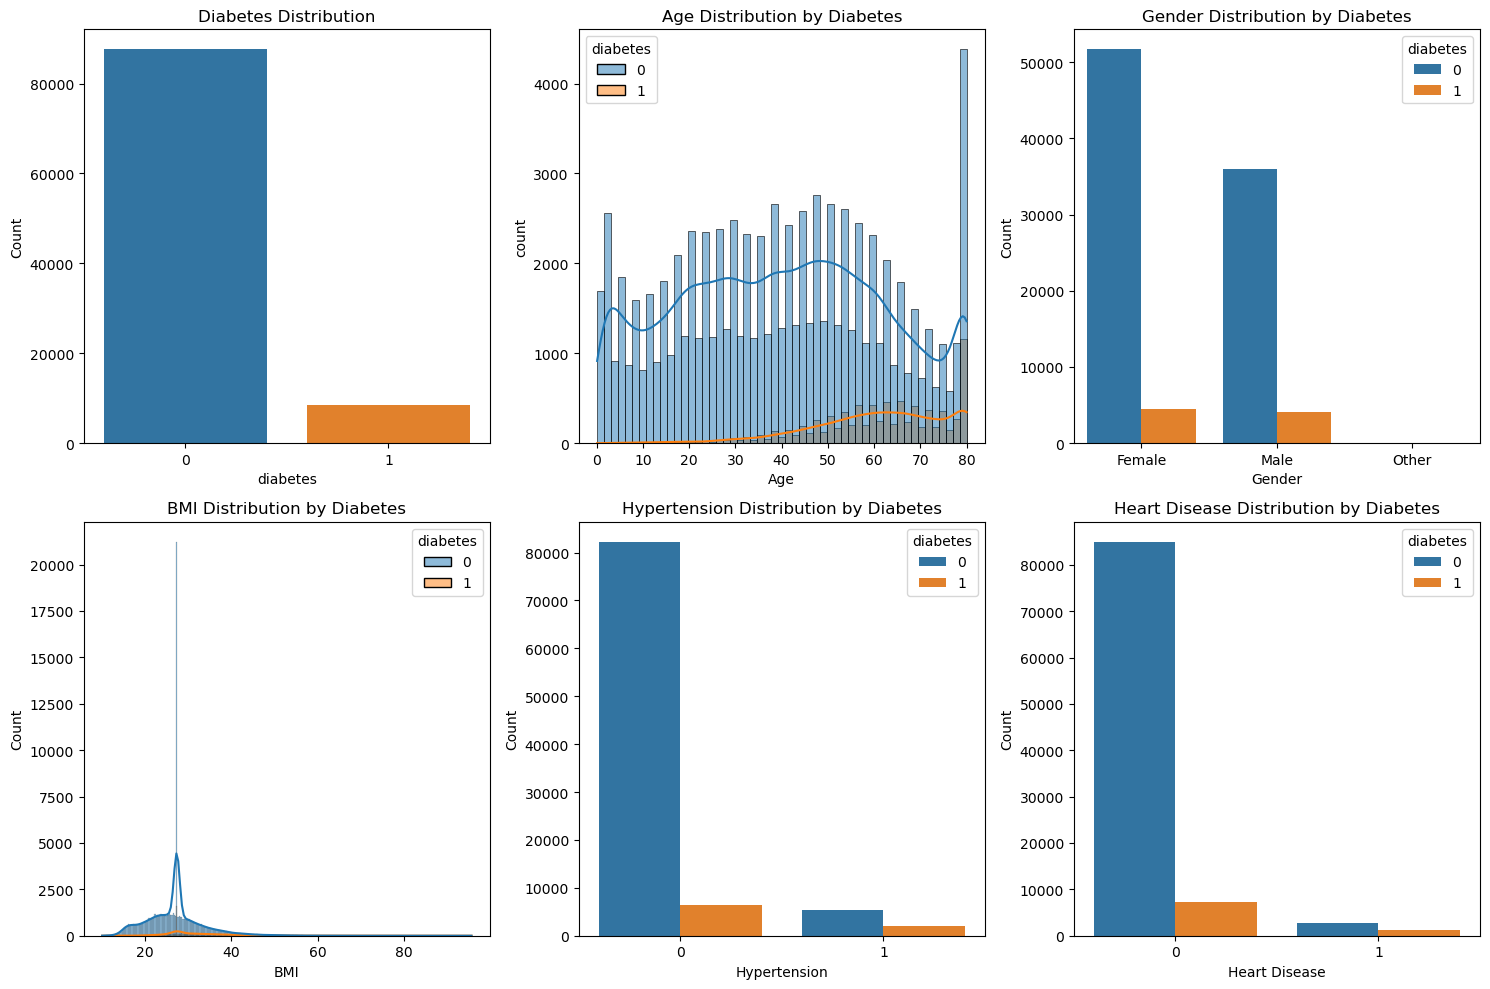

In [19]:
# Create a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# checking the distribution of the target variable 'Diabetes'
sns.barplot(x=df['diabetes'].value_counts().index, y=df['diabetes'].value_counts(), ax=axes[0, 0])
axes[0, 0].set_title('Diabetes Distribution')
axes[0, 0].set_xlabel('diabetes')
axes[0, 0].set_ylabel('Count')

# visualize the distribution of age in relation to diabetes
sns.histplot(x='age', data=df, hue='diabetes', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Diabetes')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('count')

# visualize the gender distribution with respect to diabetes
sns.countplot(x='gender', data=df, hue='diabetes', ax=axes[0, 2])
axes[0, 2].set_title('Gender Distribution by Diabetes')
axes[0, 2].set_xlabel('Gender')
axes[0, 2].set_ylabel('Count')

# Plotting the distribution of BMI in relation to diabetes
sns.histplot(x='bmi', data=df, hue='diabetes', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('BMI Distribution by Diabetes')
axes[1, 0].set_xlabel('BMI')
axes[1, 0].set_ylabel('Count')

# Visualizing the relationship between hypertension and diabetes
sns.countplot(x='hypertension', data=df, hue='diabetes', ax=axes[1, 1])
axes[1, 1].set_title('Hypertension Distribution by Diabetes')
axes[1, 1].set_xlabel('Hypertension')
axes[1, 1].set_ylabel('Count')

# Visualizing the relationship between heart disease and diabetes
sns.countplot(x='heart_disease', data=df, hue='diabetes', ax=axes[1, 2])
axes[1, 2].set_title('Heart Disease Distribution by Diabetes')
axes[1, 2].set_xlabel('Heart Disease')
axes[1, 2].set_ylabel('Count')

# Adjust the layout to prevent overlapping of titles and axis labels
plt.tight_layout()

plt.savefig('all_charts.png', dpi=300)

# Show the combined plot
plt.show()


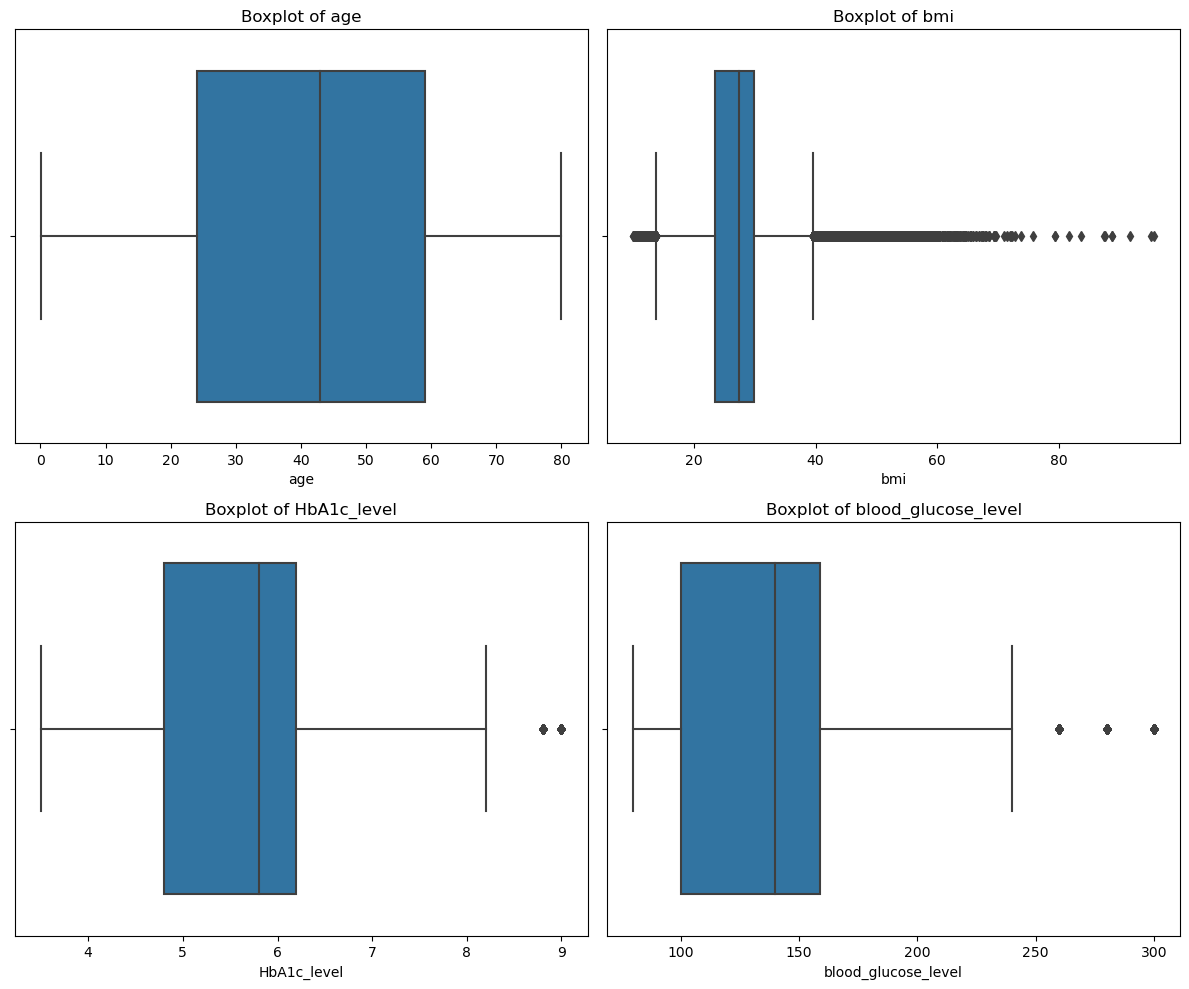

In [20]:
# Define the list of continuous attributes
continuous_attributes = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create a 2x2 grid for subplots to hold the boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create boxplots for each continuous attribute
for i, attr in enumerate(continuous_attributes):
    row = i // 2
    col = i % 2
    sns.boxplot(x=attr, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {attr}')
    axes[row, col].set_xlabel(attr)

# Adjust the layout to prevent overlapping of titles and axis labels
plt.tight_layout()

# Save all boxplots to a single image file (e.g., PNG format)
plt.savefig('all_boxplots.png', dpi=300)

# Show the combined boxplots (optional)
plt.show()



In [24]:
# Define a function to find outliers using the IQR method
def find_outliers_iqr(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers

# Find outliers for each continuous attribute
continuous_attributes = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for attr in continuous_attributes:
    outliers = find_outliers_iqr(df[attr])
    if not outliers.empty:
        print(f"Outliers in attribute '{attr}':")
        print(outliers)
        print()
    else:
        print(f"No outliers found in attribute '{attr}'.")
        print()


No outliers found in attribute 'age'.

Outliers in attribute 'bmi':
11       54.70
39       56.43
59       63.48
93       55.61
98       50.13
         ...  
99933    13.34
99948    39.62
99953    60.52
99960    45.15
99993    40.69
Name: bmi, Length: 5354, dtype: float64

Outliers in attribute 'HbA1c_level':
40       9.0
55       9.0
59       8.8
135      9.0
169      9.0
        ... 
99523    8.8
99663    9.0
99706    9.0
99740    9.0
99929    8.8
Name: HbA1c_level, Length: 1312, dtype: float64

Outliers in attribute 'blood_glucose_level':
38       260
94       300
104      280
125      280
142      300
        ... 
99763    280
99826    300
99867    300
99938    300
99957    280
Name: blood_glucose_level, Length: 2031, dtype: int64



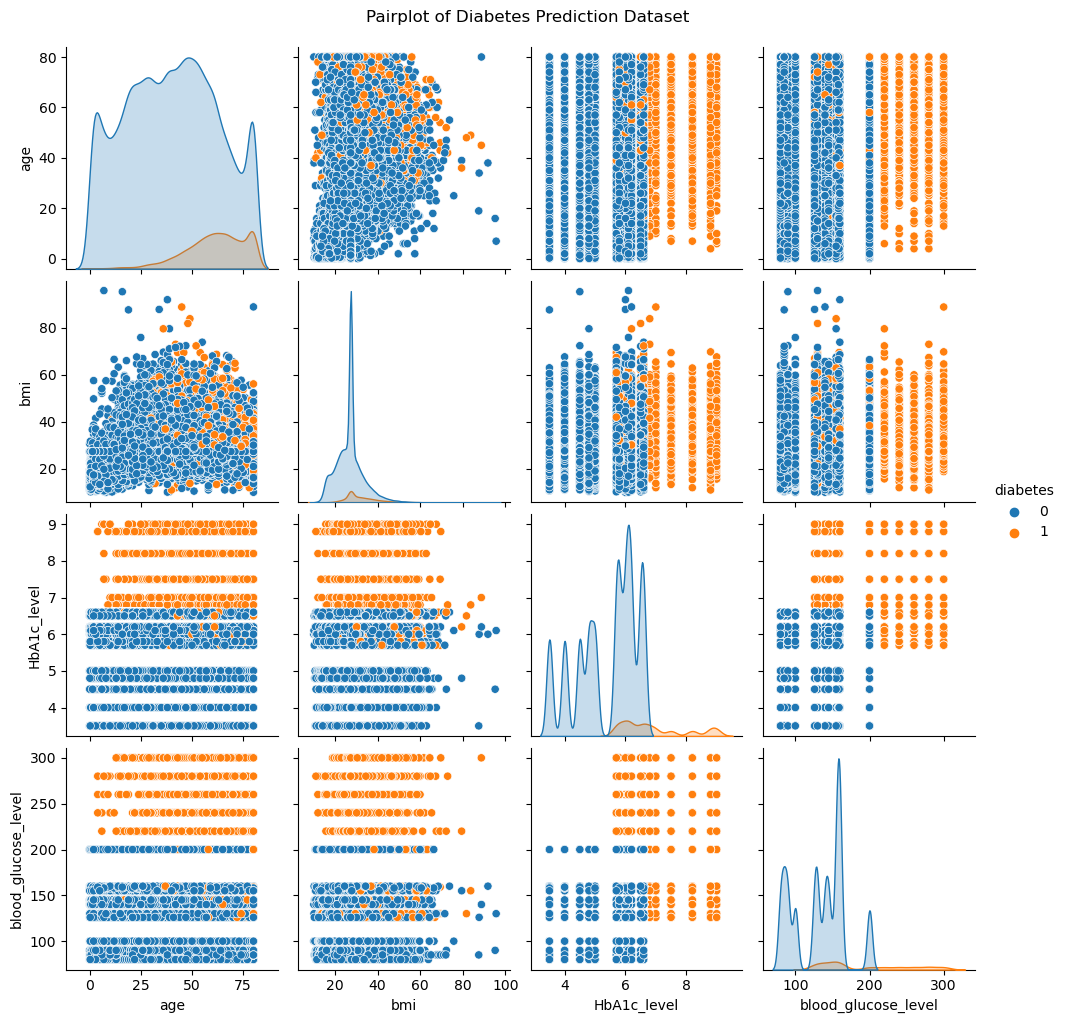

In [25]:
# Define the list of attributes to include in the pairplot (ignoring the target variable)
attributes = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Add the 'Diabetes' column to the attributes list to include it in the pairplot
attributes.append('diabetes')

# Create the pairplot
sns.pairplot(df[attributes], hue='diabetes', diag_kind='kde', markers='o')
plt.suptitle('Pairplot of Diabetes Prediction Dataset', y=1.02)
plt.show()


# Co-relation plot

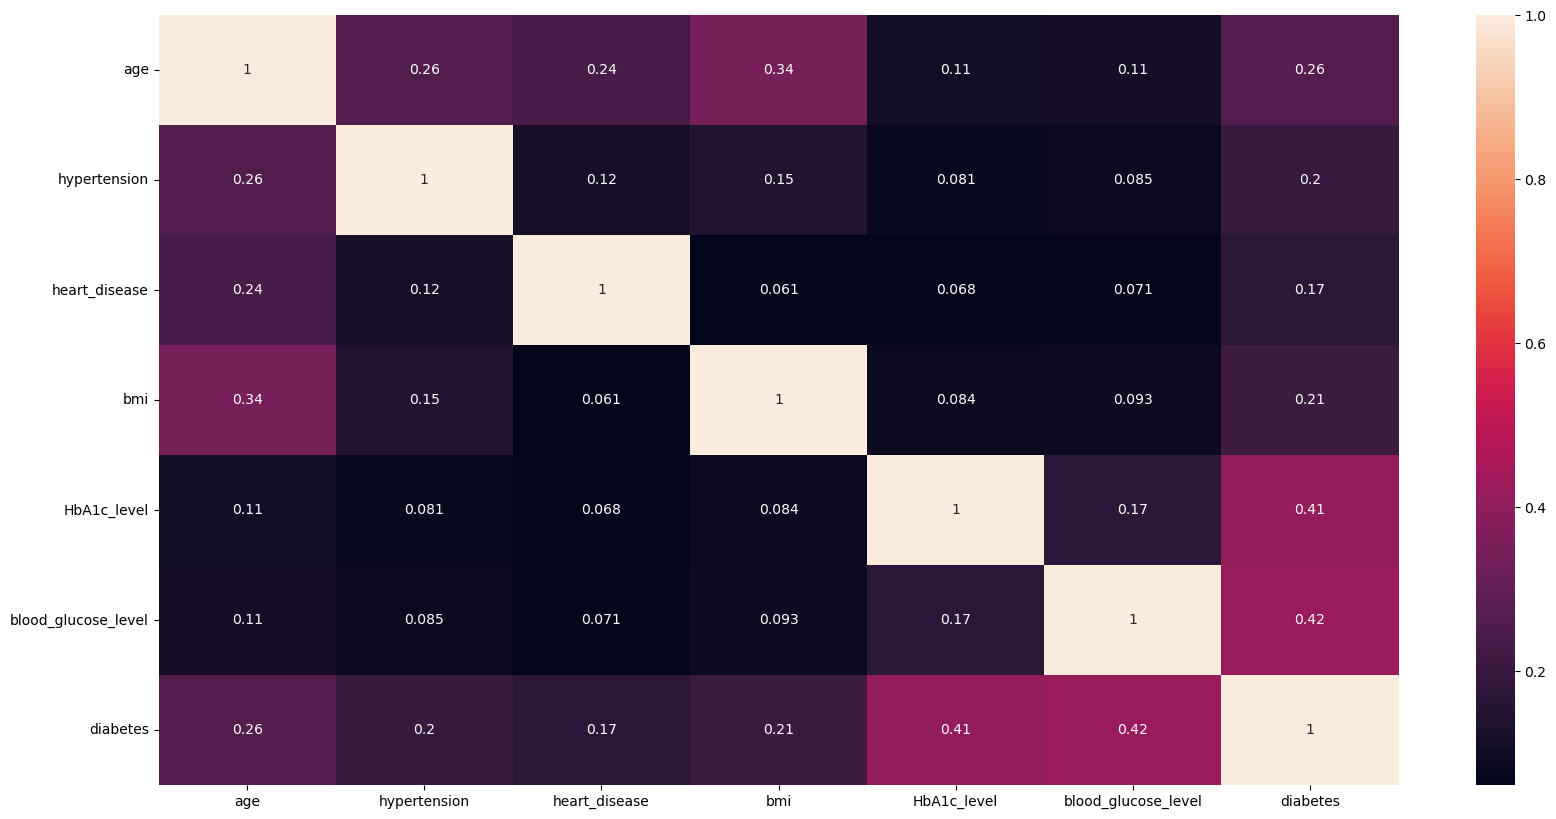

In [26]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True )     # Generate the correlation matrix heatmap
plt.show()      # Display the plot

Here we can see 'diabetes' has a  positive correlation with 'blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'hypertension', 'heart_disease'.

# Data Preprocessing

## 1. Handling Null Values :

In [27]:
# Checking for NULLs in the data
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## 2. Feature Scaling :

## 3. Handling Categorical Variables :

In [28]:
# Let's see the type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   bmi                  96146 non-null  float64
 5   HbA1c_level          96146 non-null  float64
 6   blood_glucose_level  96146 non-null  int64  
 7   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.6+ MB


In [29]:
# let's look at the statistical aspects of the dataframe

df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [30]:
# Apply one-hot encoding to the 'Gender' variable
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

# Add the 'Gender_Female' column and fill it with 0s
df['Gender_Female'] = 0

# Display the DataFrame after one-hot encoding
print(df)


        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99994  36.0             0              0  24.60          4.8   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  gender_Male  gender_Other  Gender_Female  
0                      140         0            0             0              0  
1                       80         0            0             0      

## Test-Train Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Putting feature variable to X
X = df.drop(['diabetes'], axis=1)

X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,Gender_Female
0,80.0,0,1,25.19,6.6,140,0,0,0
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0
3,36.0,0,0,23.45,5.0,155,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,0


In [33]:
# Putting response variable to y
y = df['diabetes']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [34]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [35]:
# To check the shape

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67302, 9), (28844, 9), (67302,), (28844,))

In [36]:
# Importing the MinMaxScaler from sklearn.preprocessing module

from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()  # Create an instance of MinMaxScaler

# Apply MinMaxScaler to selected features in the training data

X_train[['age','bmi','HbA1c_level','blood_glucose_level']] = scaler.fit_transform(X_train[['age','bmi','HbA1c_level','blood_glucose_level']])

X_train.head()   # Display the first few rows of the transformed training data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,Gender_Female
19583,0.149149,0,0,0.095588,0.000000,0.090909,0,0,0
35629,0.474474,0,0,0.259921,0.490909,0.090909,1,0,0
74941,0.324324,0,0,0.202031,0.418182,0.000000,0,0,0
78735,0.386887,0,0,0.270542,0.236364,0.227273,0,0,0
94120,0.111612,0,0,0.080649,0.472727,0.000000,1,0,0


In [38]:
# Displaying the first few rows of the test data

X_test.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,Gender_Female
42784,24.0,0,0,23.39,4.8,159,0,0,0
43400,63.0,0,0,32.93,5.7,159,0,0,0
78212,29.0,0,0,27.32,5.8,85,0,0,0
94175,16.0,0,0,27.32,5.0,145,0,0,0
8334,70.0,1,0,27.32,6.6,126,0,0,0


In [39]:
#scaler = MinMaxScaler()

# Apply MinMaxScaler to selected features in the test data

X_test[['age','bmi','HbA1c_level','blood_glucose_level']] = scaler.fit_transform(X_test[['age','bmi','HbA1c_level','blood_glucose_level']])

X_test.head()     # Display the first few rows of the transformed test data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,Gender_Female
42784,0.299299,0,0,0.172645,0.236364,0.359091,0,0,0
43400,0.787287,0,0,0.295742,0.400000,0.359091,0,0,0
78212,0.361862,0,0,0.223355,0.418182,0.022727,0,0,0
94175,0.199199,0,0,0.223355,0.272727,0.295455,0,0,0
8334,0.874875,1,0,0.223355,0.563636,0.209091,0,0,0


## Model Building

# Logistic Regression

Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc.

In [40]:
# Importing the LogisticRegression class from sklearn.linear_model module

from sklearn.linear_model import LogisticRegression

In [41]:
# Creating an instance of LogisticRegression

lr = LogisticRegression()

In [42]:
# Training data is used for model building

lr.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Testing data is used for prediction

y_pred_logreg = lr.predict(X_test)

In [44]:
# Importing the accuracy_score metric from sklearn.metrics module

from sklearn.metrics import accuracy_score

In [45]:
# Calculating the accuracy score between y_test and y_pred_logreg

accuracy_score(y_test, y_pred_logreg)

0.9593329635279434

In [46]:
# Libraries for Validation of models

from sklearn.metrics import confusion_matrix

In [47]:
# Calculating the confusion matrix for logistic regression model predictions

logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logistic_confusion_matrix

array([[26014,   302],
       [  871,  1657]], dtype=int64)

In [48]:
# Importing the roc_curve and roc_auc_score functions from sklearn.metrics module

from sklearn.metrics import roc_curve, roc_auc_score

In [49]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[26014   302]
 [  871  1657]]
Accuracy: [0.95933296]
Sensitivity : [0.96760275]
Specificity : [0.84583971]
Precision: [0.98852409]
Recall: [0.96760275]
F-score: [0.97795154]
AUC: 0.8219914762833797
ROC curve:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


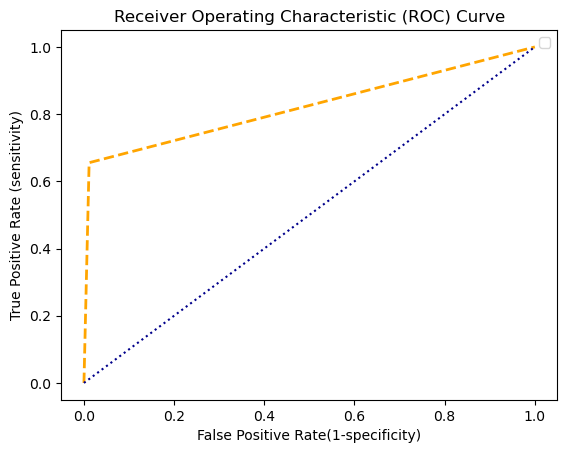

In [50]:
get_summary(y_test, y_pred_logreg)

# Support Vector Machine (SVM)

A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction.

In [51]:
# Displaying the first few rows of the training data

X_train.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,Gender_Female
19583,0.149149,0,0,0.095588,0.000000,0.090909,0,0,0
35629,0.474474,0,0,0.259921,0.490909,0.090909,1,0,0
74941,0.324324,0,0,0.202031,0.418182,0.000000,0,0,0
78735,0.386887,0,0,0.270542,0.236364,0.227273,0,0,0
94120,0.111612,0,0,0.080649,0.472727,0.000000,1,0,0


In [52]:
# Displaying the first few rows of the training target variable

y_train.head()

19583    0
35629    0
74941    0
78735    0
94120    0
Name: diabetes, dtype: int64

In [53]:
# Importing the SVC class from sklearn.svm module

from sklearn.svm import SVC

In [54]:
# Creating an instance of the SVC class

svc = SVC()

In [55]:
# Fitting the SVC model to the training data

svc.fit(X_train, y_train)

SVC()

In [56]:
# Making predictions using the fitted SVC model on the test data

y_pred_svc = svc.predict(X_test)

In [57]:
# Calculating the accuracy score between the true target values (y_test) and the predicted values (y_pred_svc) from the SVC model

accuracy_score(y_test, y_pred_svc)

0.9616904728886424

In [58]:
# Calculating the confusion matrix for the predictions made by the SVM model

SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[26256,    60],
       [ 1045,  1483]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[26256    60]
 [ 1045  1483]]
Accuracy: [0.96169047]
Sensitivity : [0.96172301]
Specificity : [0.96111471]
Precision: [0.99772002]
Recall: [0.96172301]
F-score: [0.97939086]
AUC: 0.7921748825376486
ROC curve:


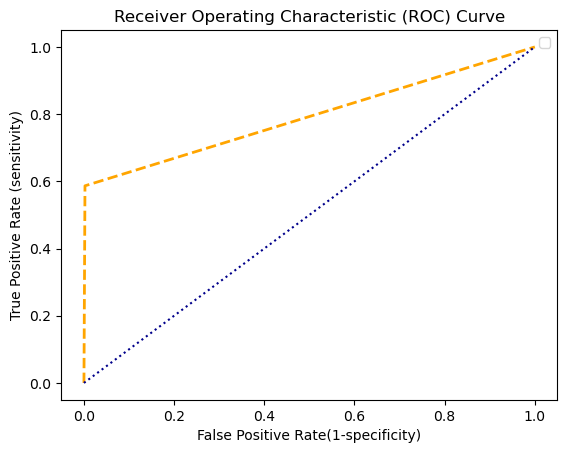

In [59]:
get_summary(y_test, y_pred_svc)

# Naive bayes Classification

In [60]:
# Importing the GaussianNB class from sklearn.naive_bayes module

from sklearn.naive_bayes import GaussianNB

In [61]:
# Creating an instance of the GaussianNB class

gnb = GaussianNB()

In [62]:
# Fitting the Gaussian Naive Bayes model to the training data

gnb.fit(X_train, y_train)

GaussianNB()

In [92]:
# Making predictions using the fitted Gaussian Naive Bayes model on the test data

y_pred_gnb = gnb.predict(X_test)

In [93]:
# Calculating the accuracy score between the true target values (y_test) and the predicted values (y_pred_gnb) from the Gaussian Naive Bayes model

accuracy_score(y_test,y_pred_gnb)

0.5085979753154902

In [94]:
# Calculating the confusion matrix for the predictions made by the Gaussian Naive Bayes model

gnb_confusion_matrix = confusion_matrix(y_test, y_pred_gnb)
gnb_confusion_matrix

array([[12165, 14151],
       [   23,  2505]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[12165 14151]
 [   23  2505]]
Accuracy: [0.50859798]
Sensitivity : [0.9981129]
Specificity : [0.15039625]
Precision: [0.4622663]
Recall: [0.9981129]
F-score: [0.6318824]
AUC: 0.7265841003018811
ROC curve:


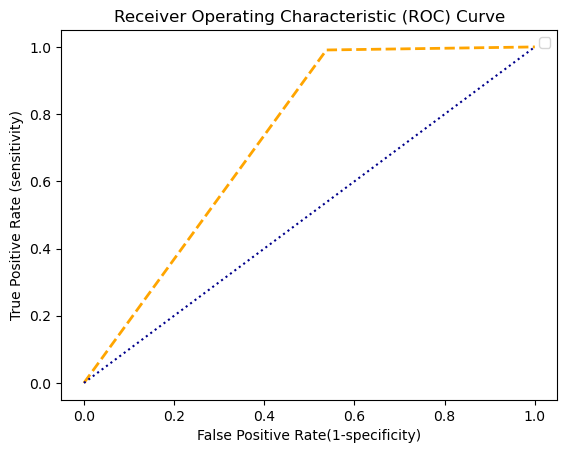

In [95]:
get_summary(y_test, y_pred_gnb)

# K - Nearest Neighbour

In [96]:
# Importing the KNeighborsClassifier class from sklearn.neighbors module

from sklearn.neighbors import KNeighborsClassifier

In [97]:
# Creating an instance of the KNeighborsClassifier class

knn = KNeighborsClassifier()

In [98]:
# Fitting the K-Nearest Neighbors (KNN) model to the training data

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
# Making predictions using the fitted K-Nearest Neighbors (KNN) model on the test data

y_pred_knn = knn.predict(X_test)

In [100]:
# Calculating the accuracy score between the true target values (y_test) and the predicted values (y_pred_knn) from the K-Nearest Neighbors (KNN) model

accuracy_score(y_test, y_pred_knn)

0.9636319511856886

In [101]:
# Calculating the confusion matrix for the predictions made by the K-Nearest Neighbors (KNN) model

knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[26086,   230],
       [  819,  1709]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[26086   230]
 [  819  1709]]
Accuracy: [0.96363195]
Sensitivity : [0.96955956]
Specificity : [0.88138216]
Precision: [0.99126007]
Recall: [0.96955956]
F-score: [0.98028974]
AUC: 0.8336442754660494
ROC curve:


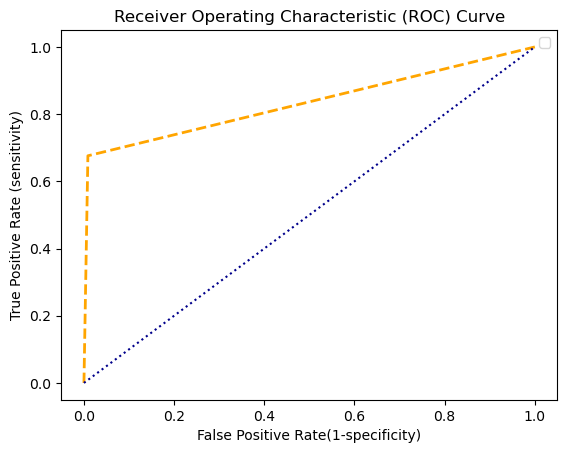

In [102]:
get_summary(y_test, y_pred_knn)

# Decision Tree

In [103]:
# Importing the DecisionTreeClassifier class from sklearn.tree module

from sklearn.tree import DecisionTreeClassifier

In [104]:
# Creating an instance of the DecisionTreeClassifier class

dtree = DecisionTreeClassifier()

In [105]:
# Fitting the Decision Tree model to the training data

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
# Making predictions using the fitted Decision Tree model on the test data

y_pred_dtree = dtree.predict(X_test)

In [107]:
# Calculating the accuracy score between the true target values (y_test) and the predicted values (y_pred_dtree) from the Decision Tree model

accuracy_score(y_test, y_pred_dtree)

0.9405422271529608

In [108]:
# Calculating the confusion matrix for the predictions made by the Decision Tree model

dtree_confusion_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_confusion_matrix

array([[25213,  1103],
       [  612,  1916]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[25213  1103]
 [  612  1916]]
Accuracy: [0.94054223]
Sensitivity : [0.97630203]
Specificity : [0.63464723]
Precision: [0.95808634]
Recall: [0.97630203]
F-score: [0.96710842]
AUC: 0.8579988638571905
ROC curve:


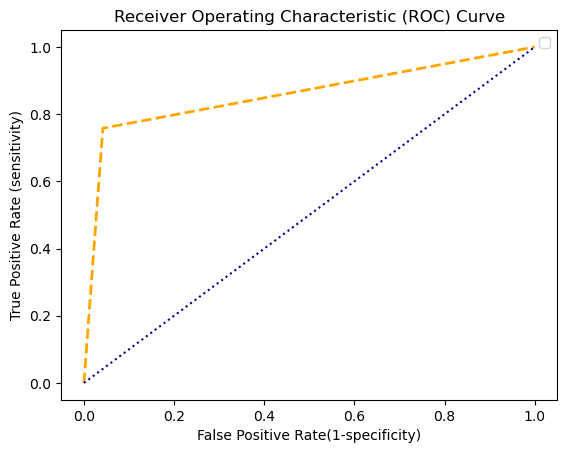

In [109]:
get_summary(y_test, y_pred_dtree)

# Random Forest

In [110]:
# Importing the RandomForestClassifier class from sklearn.ensemble module

from sklearn.ensemble import RandomForestClassifier

In [111]:
# Creating an instance of the RandomForestClassifier class

rfc = RandomForestClassifier()

In [112]:
# Fitting the Random Forest model to the training data

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [113]:
# Making predictions using the fitted Random Forest model on the test data

y_pred_rfc = rfc.predict(X_test)

In [114]:
# Calculating the accuracy score between the true target values (y_test) and the predicted values (y_pred_rfc) from the Random Forest model

accuracy_score(y_test, y_pred_rfc)

0.9684163084176952

In [115]:
# Calculating the confusion matrix for the predictions made by the Random Forest model

RandomForest_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
RandomForest_confusion_matrix

array([[26144,   172],
       [  739,  1789]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[26144   172]
 [  739  1789]]
Accuracy: [0.96841631]
Sensitivity : [0.97251051]
Specificity : [0.91228965]
Precision: [0.99346405]
Recall: [0.97251051]
F-score: [0.98287562]
AUC: 0.8505690514602466
ROC curve:


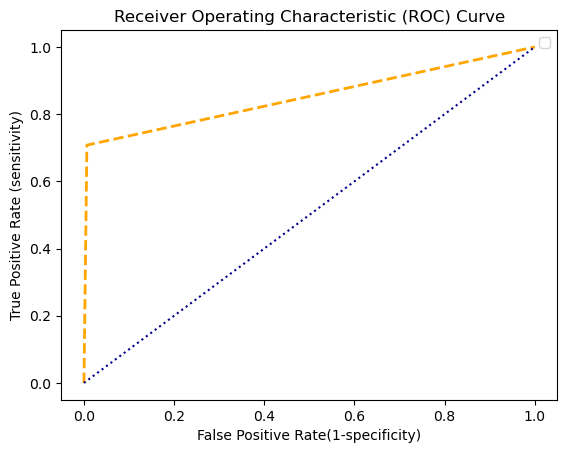

In [116]:
get_summary(y_test, y_pred_rfc)

# Best Classification Model

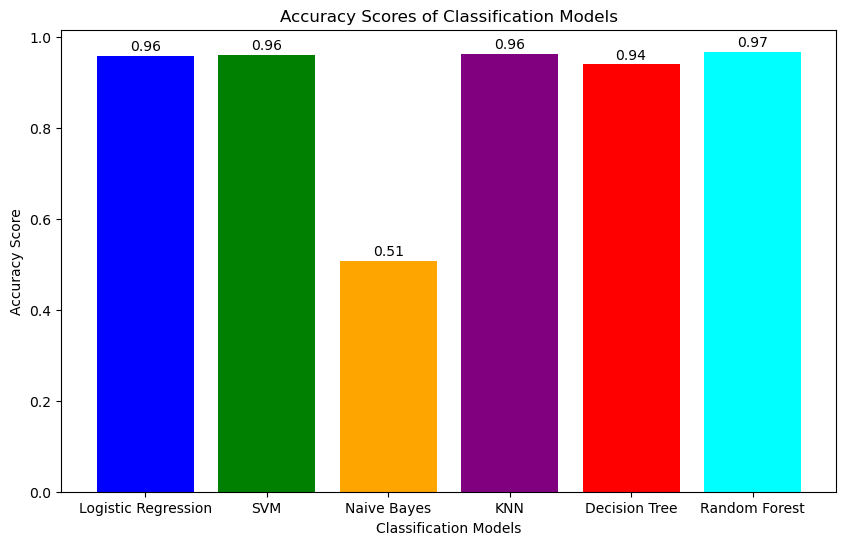

In [118]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you have defined the models and their corresponding classifiers as mentioned earlier

# Define the models and their corresponding classifiers
models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest']
classifiers = [lr, svc, gnb, knn, dtree, rfc]

# Calculate the accuracy scores for each model
accuracy_scores = []
for clf in classifiers:
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Define colors for the classifiers
colors = ['blue', 'green', 'orange', 'purple', 'red', 'cyan']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color=colors)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Classification Models')

# Annotate each bar with its corresponding accuracy score
for bar, acc in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{acc:.2f}', ha='center', va='bottom')

# Save the plot to a file
plt.savefig("Accuracy_Scores_of_Classification_Models.png")

# Display the plot
plt.show()


The Random Forest classifier is  considered as the best choice for prediction among the classifiers.